<a href="https://colab.research.google.com/github/tuanky/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Tuan_Ky_LS_DS9_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-09 03:31:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-10-09 03:31:15 (127 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
import numpy as np
#? is a no since no show is a nay to vote for the bill 
df = df.replace({'?':0, 'n':0, 'y':1}) 
rep = df[df.party == "republican"]
dem = df[df.party == "democrat"]

In [0]:
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.584270,0.449438,0.865169,0.052434,0.205993,0.460674,0.749064,0.816479,0.704120,0.464419,0.483146,0.134831,0.273408,0.337079,0.599251,0.647940
std,0.493773,0.498371,0.342185,0.223320,0.405185,0.499387,0.434366,0.387820,0.457295,0.499669,0.500654,0.342185,0.446546,0.473600,0.490971,0.478509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.184524,0.446429,0.130952,0.970238,0.934524,0.886905,0.232143,0.142857,0.113095,0.547619,0.125000,0.803571,0.809524,0.940476,0.083333,0.571429
std,0.389070,0.498608,0.338357,0.170438,0.248104,0.317656,0.423462,0.350973,0.317656,0.499215,0.331708,0.398484,0.393851,0.237310,0.277212,0.496351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?


In [0]:
# 1. Showing confidence interval numerically 
from scipy.stats import t
from scipy import stats 
a = dem['budget']
CI = t.interval(0.95, len(a) - 1, loc = np.mean(a), scale = stats.sem(a))
CI


(0.8239366017405851, 0.9064004769111003)

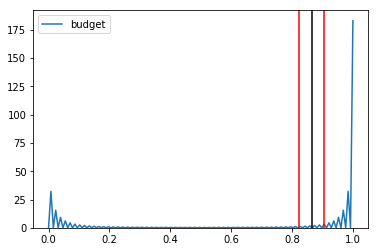

In [0]:
#2 Showing confidence interval graphically
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot()
sns.kdeplot(dem['budget']);  
#dem['budget'].plot.kde()
budget_m = np.mean(a)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='red')
plt.axvline(x=budget_m, color='k');

**3. Confidence interval tells me that 95% of the true mean of the population lies within the interval**

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [0]:
ff= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df1 = pd.crosstab(ff['day'], ff['month'], margins = True)
df1


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,All
day,,,,,,,,,,,,,
fri,1,21,1,5,0,3,3,11,1,0,1,38,85
mon,1,15,4,3,0,4,3,12,0,0,4,28,74
sat,1,29,0,4,1,8,2,10,1,0,3,25,84
sun,3,40,1,4,1,5,4,7,0,0,3,27,95
thu,2,26,1,1,0,3,2,5,0,0,0,21,61
tue,0,28,1,2,0,6,0,5,0,1,2,19,64
wed,1,25,1,1,0,3,3,4,0,0,2,14,54
All,9,184,9,20,2,32,17,54,2,1,15,172,517


In [0]:
fricount = df1.iloc[0][0:12].values
moncount = df1.iloc[1][0:12].values


In [0]:
row_sums = df1.iloc[0:7, 12].values
col_sums = df1.iloc[7, 0:12].values
total = df1.loc['All','All']
print(row_sums)
print(col_sums)

[85 74 84 95 61 64 54]
[  9 184   9  20   2  32  17  54   2   1  15 172]


In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(7, 12)
[[ 1.47969052 30.25145068  1.47969052  3.28820116  0.32882012  5.26112186
   2.79497099  8.87814313  0.32882012  0.16441006  2.46615087 28.27852998]
 [ 1.28820116 26.33655706  1.28820116  2.86266925  0.28626692  4.58027079
   2.43326886  7.72920696  0.28626692  0.14313346  2.14700193 24.61895551]
 [ 1.4622824  29.89555126  1.4622824   3.24951644  0.32495164  5.19922631
   2.76208897  8.77369439  0.32495164  0.16247582  2.43713733 27.94584139]
 [ 1.65377176 33.81044487  1.65377176  3.67504836  0.36750484  5.88007737
   3.1237911   9.92263056  0.36750484  0.18375242  2.75628627 31.60541586]
 [ 1.06189555 21.7098646   1.06189555  2.35976789  0.23597679  3.77562863
   2.00580271  6.37137331  0.23597679  0.11798839  1.76982592 20.29400387]
 [ 1.11411992 22.77756286  1.11411992  2.47582205  0.24758221  3.96131528
   2.10444874  6.68471954  0.24758221  0.1237911   1.85686654 21.29206963]
 [ 0.94003868 19.21856867  0.94003868  2.08897485  0.20889749  3.34235977
   1.77562863  5.6402321

In [0]:
observed = pd.crosstab(ff['day'], ff['month']).values
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 64.23831777674378


In [0]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 66


In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 64.23831777674378
P-value: 0.5384475410453674
Degrees of Freedom: 66
Expected: 
 [[ 1.47969052 30.25145068  1.47969052  3.28820116  0.32882012  5.26112186
   2.79497099  8.87814313  0.32882012  0.16441006  2.46615087 28.27852998]
 [ 1.28820116 26.33655706  1.28820116  2.86266925  0.28626692  4.58027079
   2.43326886  7.72920696  0.28626692  0.14313346  2.14700193 24.61895551]
 [ 1.4622824  29.89555126  1.4622824   3.24951644  0.32495164  5.19922631
   2.76208897  8.77369439  0.32495164  0.16247582  2.43713733 27.94584139]
 [ 1.65377176 33.81044487  1.65377176  3.67504836  0.36750484  5.88007737
   3.1237911   9.92263056  0.36750484  0.18375242  2.75628627 31.60541586]
 [ 1.06189555 21.7098646   1.06189555  2.35976789  0.23597679  3.77562863
   2.00580271  6.37137331  0.23597679  0.11798839  1.76982592 20.29400387]
 [ 1.11411992 22.77756286  1.11411992  2.47582205  0.24758221  3.96131528
   2.10444874  6.68471954  0.24758221  0.1237911   1.85686654 21.29206963]
 [ 0.9400386

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)